# Предобработка данных 

Подключение библиотек

In [1]:
# подключение библиотек
import numpy as np
import pandas as pd

from datetime import datetime
from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import seaborn as sns
from matplotlib import pyplot as plt

import warnings

warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize'] = 8, 8
%matplotlib inline


Пути к директориям и файлам

In [2]:
TEST_DATASET_PATH = './test.csv'
TRAIN_DATASET_PATH = './train.csv'
RESULT_FILE_PATH = './YVolkov_predictions.csv'

Описания полей датасета по недвижимости



*   **Id** - идентификационный номер квартиры
*   **DistrictId** - идентификационный номер района
*   **Rooms** - количество комнат
*   **Square** - площадь
*   **LifeSquare** - жилая площадь
*   **KitchenSquare** - площадь кухни
*   **Floor** - этаж
*   **HouseFloor** - количество этажей в доме
*   **HouseYear** - год постройки дома
*   **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
*   **Social_1, Social_2, Social_3** - социальные показатели местности
*   **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
*   **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
*   **Price** - цена квартиры

In [3]:
# загрузка файла для анализа в датафрейм
df = pd.read_csv(TRAIN_DATASET_PATH, sep = ',')

# отобраение нескольких первых строк
df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
# отображение описания
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000.0,NaN,NaN,NaN,8383.4077,4859.01902,0.0,4169.5,8394.5,12592.5,16798.0
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,10000.0,NaN,NaN,NaN,1.8905,0.839512,0.0,1.0,2.0,2.0,19.0
Square,10000.0,NaN,NaN,NaN,56.315775,21.058732,1.136859,41.774881,52.51331,65.900625,641.065193
LifeSquare,7887.0,NaN,NaN,NaN,37.199645,86.241209,0.370619,22.769832,32.78126,45.128803,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


In [5]:
# отображение общего количества строк и столбцов
print (f'Всего строк: {df.shape[0]}')
print (f'Всего столбцов: {df.shape[1]}')

Всего строк: 10000
Всего столбцов: 20


Оптимизация памяти, изменение типов даннах

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

**Памятка**

Изменение типов данных.

Даннае с целочисленными значениями:
- **Rooms** - int
- **HouseFloor** - int

Данные с категориальными значениями:
- **Ecology_2** - category
- **Ecology_3** - category
- **Shops_2** - category

Исключение параметра **id** из вывода отчета по числовым признакам. 
- **Id** - str

In [7]:
# изменение типов
#df = df.dropna()

df['Rooms'] = df['Rooms'].astype('int')
df['HouseFloor'] = df['HouseFloor'].astype('int')
df['Ecology_2'] = df['Ecology_2'].astype('category')
df['Ecology_3'] = df['Ecology_3'].astype('category')
df['Shops_2'] = df['Shops_2'].astype('category')
df['Id'] = df['Id'].astype(str)

# Анализ данных

In [8]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  object  
 1   DistrictId     10000 non-null  int64   
 2   Rooms          10000 non-null  int32   
 3   Square         10000 non-null  float64 
 4   LifeSquare     7887 non-null   float64 
 5   KitchenSquare  10000 non-null  float64 
 6   Floor          10000 non-null  int64   
 7   HouseFloor     10000 non-null  int32   
 8   HouseYear      10000 non-null  int64   
 9   Ecology_1      10000 non-null  float64 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int64   
 13  Social_2       10000 non-null  int64   
 14  Social_3       10000 non-null  int64   
 15  Healthcare_1   5202 non-null   float64 
 16  Helthcare_2    10000 non-null  int64   
 17  Shops_1        10000 non-null  i

Проверка пропусков в числовых значениях

In [10]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [11]:
# проверка пропусков
(len(df) - df.count())/len(df)

Id               0.0000
DistrictId       0.0000
Rooms            0.0000
Square           0.0000
LifeSquare       0.2113
KitchenSquare    0.0000
Floor            0.0000
HouseFloor       0.0000
HouseYear        0.0000
Ecology_1        0.0000
Ecology_2        0.0000
Ecology_3        0.0000
Social_1         0.0000
Social_2         0.0000
Social_3         0.0000
Healthcare_1     0.4798
Helthcare_2      0.0000
Shops_1          0.0000
Shops_2          0.0000
Price            0.0000
dtype: float64

Проауски LifeSquare дополняем значением одбщей площади умноженной на коэфф. 0.6. 
Параметр Healthcare_1 - будет опущен, т.к. пропуски данных более 47%.

In [12]:
# заполняем пропуски LifeSquare значением медианы
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square']*0.6
# проверяем 
df['LifeSquare'].isna().sum()

0

Проверка неочевидных пропусков в категориальных значениях

In [13]:
df['Ecology_2'].unique()

['B', 'A']
Categories (2, object): ['A', 'B']

In [14]:
df['Ecology_3'].unique()

['B', 'A']
Categories (2, object): ['A', 'B']

In [15]:
df['Shops_2'].unique()

['B', 'A']
Categories (2, object): ['A', 'B']

In [16]:
# анализ данных
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,10000,10000,14038,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,10000.0,NaN,NaN,NaN,50.4008,43.587592,0.0,20.0,36.0,75.0,209.0
Rooms,10000.0,NaN,NaN,NaN,1.8905,0.839512,0.0,1.0,2.0,2.0,19.0
Square,10000.0,NaN,NaN,NaN,56.315775,21.058732,1.136859,41.774881,52.51331,65.900625,641.065193
LifeSquare,10000.0,NaN,NaN,NaN,36.990868,76.848476,0.370619,23.949834,33.129704,44.655055,7480.592129
KitchenSquare,10000.0,NaN,NaN,NaN,6.2733,28.560917,0.0,1.0,6.0,9.0,2014.0
Floor,10000.0,NaN,NaN,NaN,8.5267,5.241148,1.0,4.0,7.0,12.0,42.0
HouseFloor,10000.0,NaN,NaN,NaN,12.6094,6.775974,0.0,9.0,13.0,17.0,117.0
HouseYear,10000.0,NaN,NaN,NaN,3990.1663,200500.261427,1910.0,1974.0,1977.0,2001.0,20052011.0
Ecology_1,10000.0,NaN,NaN,NaN,0.118858,0.119025,0.0,0.017647,0.075424,0.195781,0.521867


<AxesSubplot:xlabel='Rooms'>

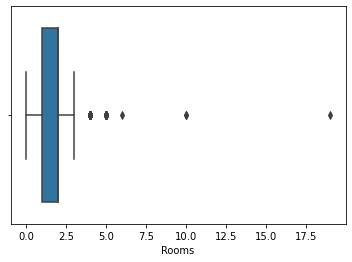

In [17]:
sns.boxplot(df['Rooms'])

In [18]:
np.percentile(df['Rooms'], 99.6)

4.0

In [19]:
median_of_Rooms = df['Rooms'].median()
median_of_Rooms

2.0

In [20]:
# значение 0 и больше 5 прировняем к медиане
df.loc[(df['Rooms'] == 0 ) | (df['Rooms'] > 5) , 'Rooms'] = median_of_Rooms

<AxesSubplot:xlabel='Rooms'>

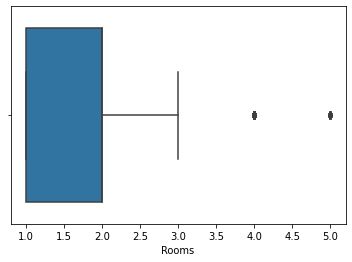

In [21]:
sns.boxplot(df['Rooms'])

<AxesSubplot:xlabel='Square'>

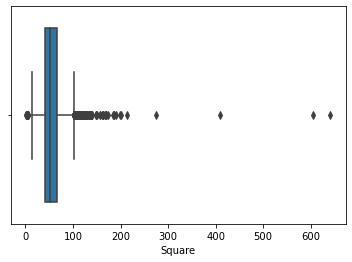

In [22]:
# анализ параметра Square
sns.boxplot(df['Square'])

In [23]:
np.percentile(df['Square'], 99.6)

135.96324808847402

In [24]:
# значения Square 0 или больше 150 приводим к медиане
df.loc[(df['Square'] == 0 ) | (df['Square'] > 150) , 'Square'] = df['Square'].median()

<AxesSubplot:xlabel='Square', ylabel='Density'>

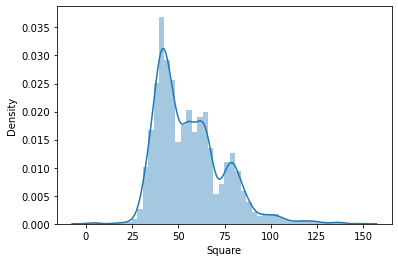

In [25]:
sns.distplot(df['Square'])

<AxesSubplot:xlabel='LifeSquare'>

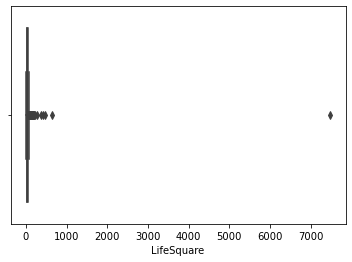

In [26]:
# анализ параметра LifeSquare
sns.boxplot(df['LifeSquare'])

In [27]:
np.percentile(df['LifeSquare'], 99.6)

107.93313414052342

In [28]:
# значения LifeSquare 0 или больше 150 приводим к медиане
df.loc[(df['LifeSquare'] == 0 ) | (df['LifeSquare'] > 150) , 'LifeSquare'] = df['LifeSquare'].median()
df.loc[(df['LifeSquare'] > df['Square']), 'LifeSquare'] = df['Square']

<AxesSubplot:xlabel='LifeSquare', ylabel='Density'>

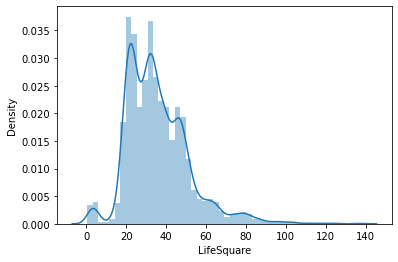

In [29]:
sns.distplot(df['LifeSquare'])

26.004000000000815

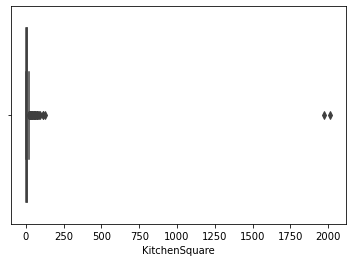

In [30]:
# анализ параметра KitchenSquare
sns.boxplot(df['KitchenSquare'])
np.percentile(df['KitchenSquare'], 99.6)

In [31]:
# значения KitchenSquare 0 или больше 30 приводим к медиане
df.loc[(df['KitchenSquare'] == 0 ) | (df['KitchenSquare'] > 30) , 'KitchenSquare'] = df['KitchenSquare'].median()

<AxesSubplot:xlabel='KitchenSquare', ylabel='Density'>

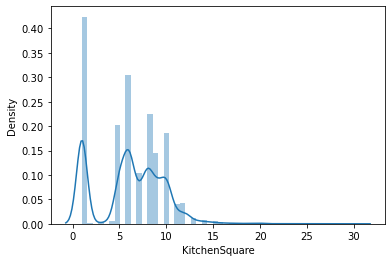

In [32]:
sns.distplot(df['KitchenSquare'])

30.0

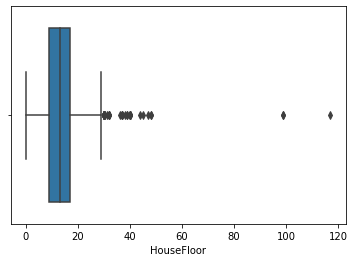

In [33]:
# анализ параметра HouseFloor
sns.boxplot(df['HouseFloor'])
np.percentile(df['HouseFloor'], 99.6)

In [34]:
# значения HouseFloor 0 или больше 60 приводим к медиане или к значению этажа квартиры
median_HouseFloor = df['HouseFloor'].median()
df.loc[(df['HouseFloor'] == 0 ) & (df['Floor'] > median_HouseFloor) , 'HouseFloor'] = df['Floor']
df.loc[(df['HouseFloor'] == 0 ) & (df['Floor'] < median_HouseFloor) , 'HouseFloor'] = median_HouseFloor
df.loc[(df['HouseFloor'] > 60 ) & (df['Floor'] > median_HouseFloor) , 'HouseFloor'] = df['Floor']
df.loc[(df['HouseFloor'] > 60 ) & (df['Floor'] < median_HouseFloor) , 'HouseFloor'] = median_HouseFloor

<AxesSubplot:xlabel='HouseFloor', ylabel='Density'>

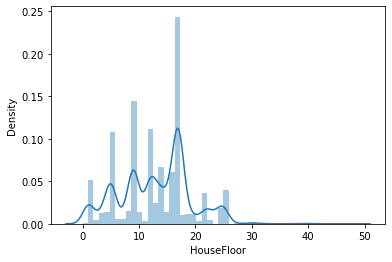

In [35]:
sns.distplot(df['HouseFloor'])

25.0

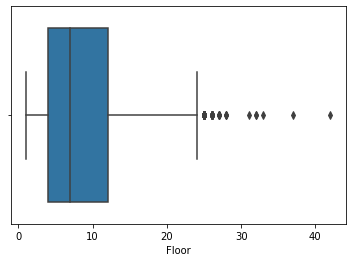

In [36]:
# анализ параметра Floor
sns.boxplot(df['Floor'])
np.percentile(df['Floor'], 99.6)

In [37]:
# проверяем чтобы значение Floor не превышало HouseFloor
df.loc[(df['Floor'] > df['HouseFloor']), 'Floor']  = df['HouseFloor']

Обработка года

In [38]:
# находим неадекватные значения
currentYear = datetime.now().year

df[df['HouseYear'] > datetime.now().year]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1,37.265070,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2,44.791836,28.360393,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [39]:
# заменяем года выше текущего на медиану
df.loc[df['HouseYear']>datetime.now().year, 'HouseYear'] = df['HouseYear'].median()

In [40]:
df['HouseYear'].describe()

count    10000.000000
mean      1984.863800
std         18.409979
min       1910.000000
25%       1974.000000
50%       1977.000000
75%       2001.000000
max       2020.000000
Name: HouseYear, dtype: float64

Исключение признака id

In [41]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [42]:
# перзаписываем датафрейм без первого столбца
df = df[df.columns[1:]]

# проверяем 
df.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

Преобразование категориальных признаков

In [43]:
# добавляем в дата фрейм разбивку категориальных признаков
df = pd.concat([df, pd.get_dummies(df['Ecology_2'], prefix='Eco_2')], axis = 1)
df = pd.concat([df, pd.get_dummies(df['Ecology_3'], prefix='Eco_3')], axis = 1)
df = pd.concat([df, pd.get_dummies(df['Shops_2'], prefix='Sh_2')], axis = 1)

# проверяем
df.sample(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,Eco_2_A,Eco_2_B,Eco_3_A,Eco_3_B,Sh_2_A,Sh_2_B
1003,3,1,40.542284,21.907003,6.0,5,9,1977,0.050900,B,...,2,3,B,138357.733272,0,1,0,1,0,1
7929,41,3,63.555429,44.365271,8.0,8,9,1979,0.000070,B,...,1,16,B,275489.807669,0,1,0,1,0,1
6871,6,2,73.612474,44.167485,1.0,15,17,1977,0.243205,B,...,0,0,B,186743.170384,0,1,0,1,0,1
1018,119,1,32.860029,23.940883,5.0,3,9,1968,0.000995,B,...,1,5,B,129339.268164,0,1,0,1,0,1
6739,55,1,39.770285,22.063326,8.0,11,25,2004,0.041365,B,...,1,4,B,184010.766218,0,1,0,1,0,1


# Подготовка модели

Функция подготовки данных

In [44]:
def data_prepare (df):
  # изменение типов
  df['Rooms'] = df['Rooms'].astype('int')
  df['HouseFloor'] = df['HouseFloor'].astype('int')
  df['Ecology_2'] = df['Ecology_2'].astype('category')
  df['Ecology_3'] = df['Ecology_3'].astype('category')
  df['Shops_2'] = df['Shops_2'].astype('category')
    
  # заполняем пропуски LifeSquare значением медианы
  #df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()
  df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square']*0.6
    
  # обработка выбросов
  # rooms
  df.loc[(df['Rooms'] == 0 ) | (df['Rooms'] > 5) , 'Rooms'] = df['Rooms'].median()

  # значения Square 0 или больше 150 приводим к медиане
  df.loc[(df['Square'] == 0 ) | (df['Square'] > 150) , 'Square'] = df['Square'].median()

  # значения LifeSquare 0 или больше 150 приводим к медиане
  df.loc[(df['LifeSquare'] == 0 ) | (df['LifeSquare'] > 150) , 'LifeSquare'] = df['LifeSquare'].median()
  df.loc[(df['LifeSquare'] > df['Square']), 'LifeSquare'] = df['Square']

  # значения KitchenSquare 0 или больше 30 приводим к медиане
  df.loc[(df['KitchenSquare'] == 0 ) | (df['KitchenSquare'] > 30) , 'KitchenSquare'] = df['KitchenSquare'].median()
    
  # значения HouseFloor 0 или больше 60 приводим к медиане или к значению этажа квартиры
  median_HouseFloor = df['HouseFloor'].median()
  df.loc[(df['HouseFloor'] == 0 ) & (df['Floor'] > median_HouseFloor) , 'HouseFloor'] = df['Floor']
  df.loc[(df['HouseFloor'] == 0 ) & (df['Floor'] < median_HouseFloor) , 'HouseFloor'] = median_HouseFloor
  df.loc[(df['HouseFloor'] > 60 ) & (df['Floor'] > median_HouseFloor) , 'HouseFloor'] = df['Floor']
  df.loc[(df['HouseFloor'] > 60 ) & (df['Floor'] < median_HouseFloor) , 'HouseFloor'] = median_HouseFloor
    
  # проверяем чтобы значение Floor не превышало HouseFloor
  df.loc[(df['Floor'] > df['HouseFloor']), 'Floor']  = df['HouseFloor']

  # исправление года
  df.loc[df['HouseYear'] > datetime.now().year, 'HouseYear'] = df['HouseYear'].median()


  # добавляем в дата фрейм разбивку категориальных признаков
  df = pd.concat([df, pd.get_dummies(df['Ecology_2'], prefix='Eco_2')], axis = 1)
  df = pd.concat([df, pd.get_dummies(df['Ecology_3'], prefix='Eco_3')], axis = 1)
  df = pd.concat([df, pd.get_dummies(df['Shops_2'], prefix='Sh_2')], axis = 1)
  
  return df

Выделение ключевых параметров

In [45]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
                 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1',
                 'Social_2', 'Social_3', 'Helthcare_2',
                 'Shops_1','Eco_2_A', 'Eco_2_B', 'Eco_3_A','Eco_3_B',
                 'Sh_2_A', 'Sh_2_B']

target = 'Price'

Функция для запуска модели

In [46]:
def start_model (X_train, y_train, X_test, y_test, feats, model):

  model.fit(X_train.loc[:, feats], y_train)

  y_pred = model.predict(X_test.loc[:, feats])
  r2 = r2_score(y_test, y_pred)
  print (f'R2_score = {r2}')
    
  return y_pred

# Загрузка данных

In [47]:
train = pd.read_csv(TRAIN_DATASET_PATH, sep = ',')
train = data_prepare(train)

Распределение данных для использования в модели

In [48]:
# train.columns

In [49]:
# test.columns

In [50]:
# Разбивка датасета
X_train, X_test, y_train, y_test = train_test_split(train[feature_names], 
                                                    train[target], test_size=0.3, random_state=42)

X_train.sample(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Eco_2_A,Eco_2_B,Eco_3_A,Eco_3_B,Sh_2_A,Sh_2_B
3904,62,1,56.871239,34.122744,6.0,4,13,1977,0.072158,2,629,1,0,0,0,1,0,1,1,0
5163,8,3,84.955385,45.393142,10.0,14,14,2008,0.437885,23,5735,3,0,5,0,1,0,1,0,1
378,1,1,37.885188,37.885188,10.0,12,17,1977,0.007122,1,264,0,0,1,0,1,0,1,0,1
3568,38,1,32.272265,22.548493,5.0,5,9,1964,0.060753,15,2787,2,0,7,0,1,0,1,0,1
3356,27,1,52.619125,51.083320,1.0,6,24,2014,0.072158,2,629,1,0,0,0,1,0,1,1,0


In [51]:
# cтандартизация наборов данны
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

# Запуск моделей

**Модель линейной регрессии**

In [52]:
model_1 = LinearRegression()
start_model (X_train, y_train, X_test, y_test, feature_names, model_1)

R2_score = 0.5191996496742175


array([176719.22929288, 279865.25783309, 244060.94721999, ...,
       207480.56861032, 124280.34814266, 259561.47549394])

In [53]:
start_model (X_train_scaled, y_train, X_test_scaled, y_test, feature_names, model_1)

R2_score = 0.5190984778342504


array([177441.59528682, 280972.48361304, 244500.96631909, ...,
       208589.99829271, 125282.29650125, 260515.73307733])

**Модель Lasso**

In [54]:
model_2 = Lasso(alpha=0.03)
start_model (X_train, y_train, X_test, y_test, feature_names, model_2)

R2_score = 0.5191998358641765


array([176719.0146462 , 279865.68101728, 244061.16598775, ...,
       207480.49291722, 124281.22939178, 259561.47785508])

In [55]:
start_model (X_train_scaled, y_train, X_test_scaled, y_test, feature_names, model_2)

R2_score = 0.5190985636010277


array([177441.66479729, 280972.64250029, 244500.52888647, ...,
       208590.05590005, 125282.64055463, 260515.6473784 ])

**Модель Random Forest Regressor**

In [56]:
model_3 = RFR(n_estimators= 500, min_samples_leaf=1, n_jobs=-1, random_state=42, max_features= 3)
start_model (X_train, y_train, X_test, y_test, feature_names, model_3)

R2_score = 0.7213837693746254


array([186463.67563925, 309207.96779103, 209648.83367153, ...,
       251081.80839568, 122929.78491778, 254163.20300133])

In [57]:
start_model (X_train_scaled, y_train, X_test_scaled, y_test, feature_names, model_3)

R2_score = 0.7138367399909762


array([185760.99138595, 314498.92060852, 209277.05415458, ...,
       253702.60135287, 126553.61918875, 256507.5957876 ])

**Лучшая метрика у модели Random Forest Regressor без стандартизации данных**

# Работа с файлом test

In [58]:
# Загружаем данные тестового файла
test = pd.read_csv(TEST_DATASET_PATH, sep = ',')
test = data_prepare(test)


In [59]:
# Запускаем модель с тестовым файлом
test['Price'] = model_3.predict(test.loc[:, feature_names])

In [60]:
# Проверяем данные
test.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,5000.0,NaN,NaN,NaN,8412.5954,4832.674037,1.0,4221.75,8320.5,12598.25,16795.0
DistrictId,5000.0,NaN,NaN,NaN,51.2792,44.179466,0.0,21.0,37.0,77.0,212.0
Rooms,5000.0,NaN,NaN,NaN,1.9062,0.805935,1.0,1.0,2.0,2.0,5.0
Square,5000.0,NaN,NaN,NaN,56.240424,18.377227,1.378543,41.906231,52.919578,66.233526,148.783492
LifeSquare,5000.0,NaN,NaN,NaN,35.946352,15.868496,0.33349,24.056475,33.30887,44.687708,136.92109
KitchenSquare,5000.0,NaN,NaN,NaN,6.1076,3.518934,1.0,5.0,6.0,9.0,30.0
Floor,5000.0,NaN,NaN,NaN,8.0716,5.38727,0.0,4.0,7.0,11.0,46.0
HouseFloor,5000.0,NaN,NaN,NaN,12.9246,6.381744,0.0,9.0,13.0,17.0,48.0
HouseYear,5000.0,NaN,NaN,NaN,1984.3926,18.573149,1908.0,1973.0,1977.0,2000.0,2020.0
Ecology_1,5000.0,NaN,NaN,NaN,0.119874,0.12007,0.0,0.019509,0.072158,0.195781,0.521867


In [61]:
# запись результата
test.loc[:, ['Id', 'Price']].to_csv(RESULT_FILE_PATH, index = False)